In [2]:
# !pip install uproot awkward mpl_scatter_density jupyter-dash zfit
import uproot, scipy, math, os, random, time, pickle, collections
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import awkward as ak
from tqdm import tqdm
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.stats import iqr
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
f_unb_st= uproot.open('/global/u2/a/agarabag/pscratch/kfalignment_single_muon_unbiased_newmag2Ke.root')
f_b_st= uproot.open('/global/u2/a/agarabag/pscratch/kfalignment_single_muon_biased_newmag2Ke.root')
f_unb_survey= uproot.open('/global/u2/a/agarabag/pscratch/srvalignment_unbiased_KeMuon.root')
f_b_survey= uproot.open('/global/u2/a/agarabag/pscratch/srvalignment_biased_KeMuon.root')
# f_ke = uproot.open('/global/u2/a/agarabag/pscratch/kfalignment_mc_iter27.root')
# f_unb_st['trackParam;1'].show()

In [4]:
unb_st = f_unb_st['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [5]:
unb_survey = f_unb_survey['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [6]:
b_survey = f_b_survey['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [7]:
b_st = f_b_st['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [9]:
def cutting(data):
    p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
    cut = ak.where( (p > 0))
               # (ak.flatten(data['fitParam_chi2']) < 100)&
               # (ak.flatten(data['fitParam_charge']) == charge)&
               # (ak.min(ak.flatten(data['fitParam_align_stationId_sp']), axis=-1)==0)&
               # (ak.min(ak.flatten(data['fitParam_align_layerId_sp']), axis=-1)==0)&
               # (ak.flatten(data['fitParam_nMeasurements']) > 14))
    return cut

In [1]:
# plt.figure(figsize=(13, 9))
# bin=np.linspace(-10, 10, 201)
# plt.xlim(-10, 10)
# plt.hist(ak.flatten(ke['fitParam_z'])[cutting(ke)], bins=bin, histtype='step', linewidth=2, alpha=0.8, density=True, label="ke's unbiased")
# plt.hist(ak.flatten(unb_st['fitParam_z'])[cutting(unb_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8, density=True, label="unbiased")
# plt.hist(ak.flatten(b_st['fitParam_z'])[cutting(b_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8, density=True, label="biased")
# plt.xlabel('Global position z (mm)', fontsize=18)
# plt.ylabel('Number of Events (normalized)', fontsize=18)
# plt.legend(fontsize=14)
# plt.xticks(fontsize=15)
# plt.title('Track Z0 position', fontsize=22)
# plt.show()

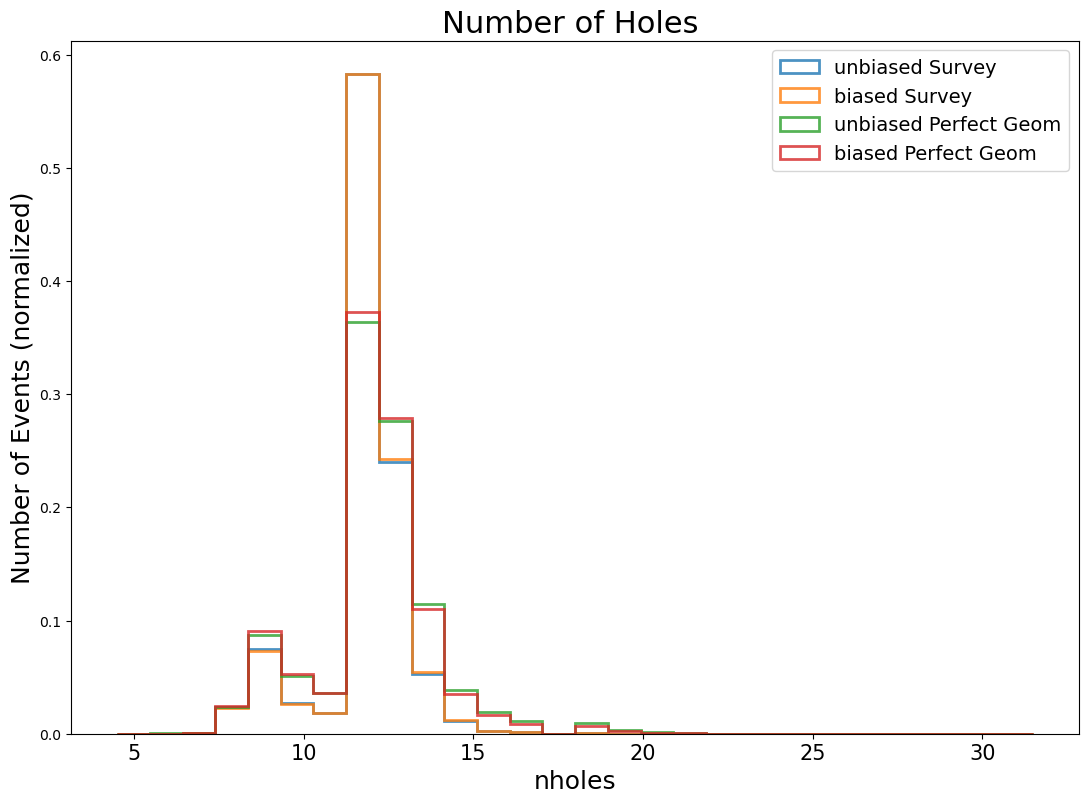

In [21]:
plt.figure(figsize=(13, 9))
bin=np.linspace(4.5, 31.5, 29)
plt.hist(ak.flatten(unb_survey['fitParam_nHoles'])[cutting(unb_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Survey")
plt.hist(ak.flatten(b_survey['fitParam_nHoles'])[cutting(b_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Survey")
plt.hist(ak.flatten(unb_st['fitParam_nHoles'])[cutting(unb_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Perfect Geom")
plt.hist(ak.flatten(b_st['fitParam_nHoles'])[cutting(b_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Perfect Geom")
plt.xlabel('nholes', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Number of Holes ', fontsize=22)
plt.xticks(np.linspace(5, 30, 6), fontsize=15)
plt.show()

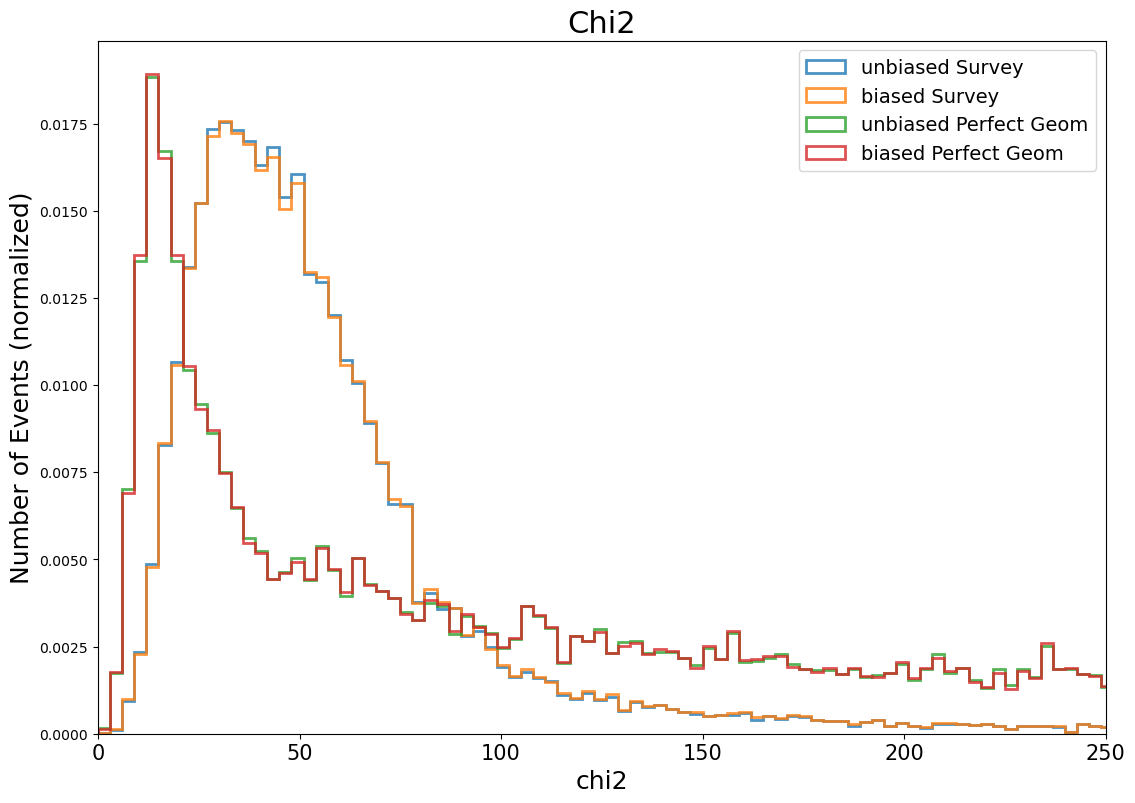

In [18]:
plt.figure(figsize=(13, 9))
bin=np.linspace(0, 300, 101)
plt.hist(ak.flatten(unb_survey['fitParam_chi2'])[cutting(unb_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Survey")
plt.hist(ak.flatten(b_survey['fitParam_chi2'])[cutting(b_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Survey")
plt.hist(ak.flatten(unb_st['fitParam_chi2'])[cutting(unb_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Perfect Geom")
plt.hist(ak.flatten(b_st['fitParam_chi2'])[cutting(b_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Perfect Geom")
plt.xlabel('chi2', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Chi2', fontsize=22)
plt.xlim(0, 250)
#plt.xticks(np.linspace(5, 30, 6), fontsize=15)
plt.show()

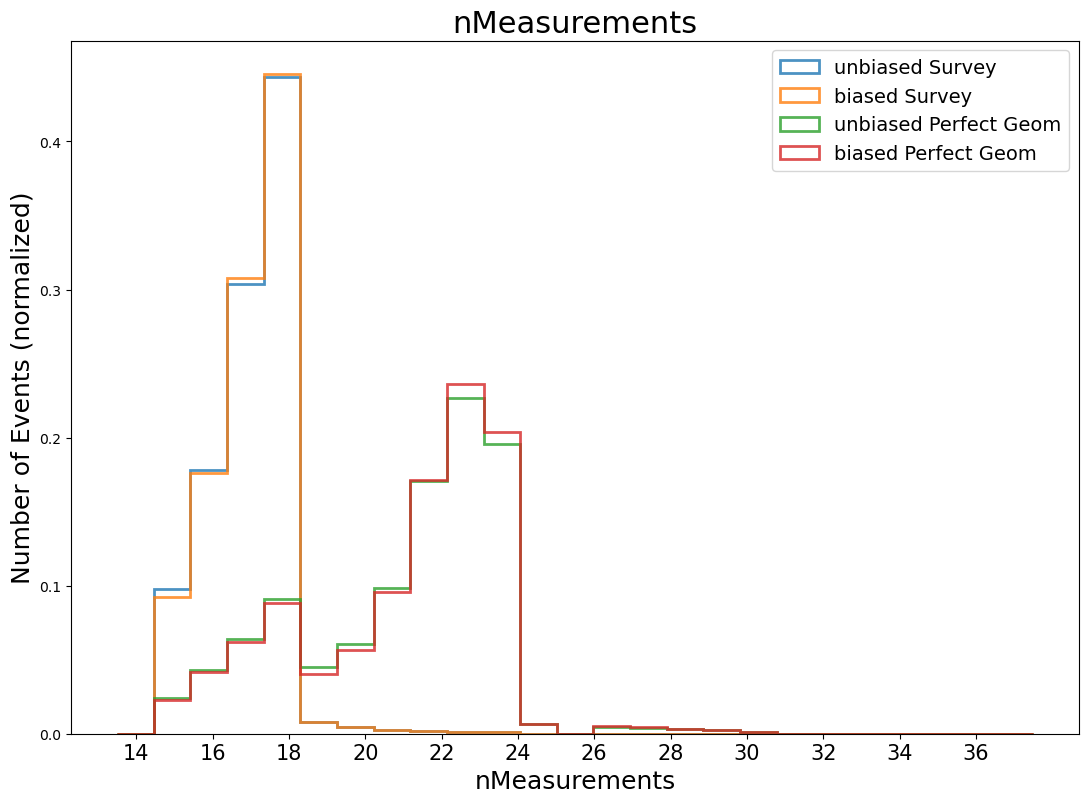

In [22]:
plt.figure(figsize=(13, 9))
bin=np.linspace(13.5, 37.5, 26)

plt.hist(ak.flatten(unb_survey['fitParam_nMeasurements'])[cutting(unb_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Survey")
plt.hist(ak.flatten(b_survey['fitParam_nMeasurements'])[cutting(b_survey)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Survey")
plt.hist(ak.flatten(unb_st['fitParam_nMeasurements'])[cutting(unb_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="unbiased Perfect Geom")
plt.hist(ak.flatten(b_st['fitParam_nMeasurements'])[cutting(b_st)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="biased Perfect Geom")

plt.xlabel('nMeasurements', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.linspace(14, 36, 12), fontsize=15)
plt.title('nMeasurements', fontsize=22)
plt.show()

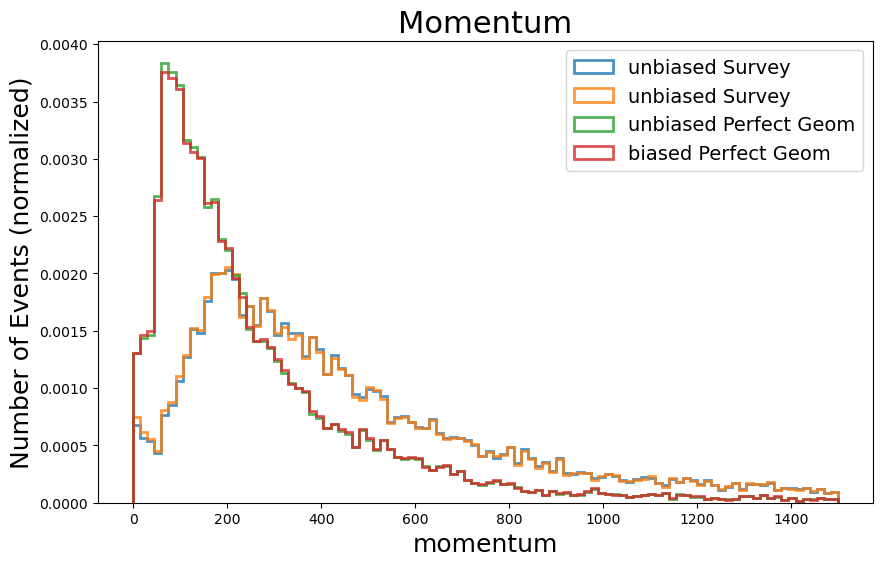

In [24]:
plt.figure(figsize=(10, 6))
def mom(px, py, pz):
    return np.sqrt(px**2+py**2+pz**2)
plt.hist(mom(ak.flatten(unb_survey['fitParam_px'])[cutting(unb_survey)], ak.flatten(unb_survey['fitParam_py'])[cutting(unb_survey)], ak.flatten(unb_survey['fitParam_pz'])[cutting(unb_survey)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label="unbiased Survey")
plt.hist(mom(ak.flatten(b_survey['fitParam_px'])[cutting(b_survey)], ak.flatten(b_survey['fitParam_py'])[cutting(b_survey)], ak.flatten(b_survey['fitParam_pz'])[cutting(b_survey)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label="unbiased Survey")
plt.hist(mom(ak.flatten(unb_st['fitParam_px'])[cutting(unb_st)], ak.flatten(unb_st['fitParam_py'])[cutting(unb_st)], ak.flatten(unb_st['fitParam_pz'])[cutting(unb_st)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label='unbiased Perfect Geom')
plt.hist(mom(ak.flatten(b_st['fitParam_px'])[cutting(b_st)], ak.flatten(b_st['fitParam_py'])[cutting(b_st)], ak.flatten(b_st['fitParam_pz'])[cutting(b_st)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label='biased Perfect Geom')

plt.xlabel('momentum', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.title('Momentum', fontsize=22)
plt.show()

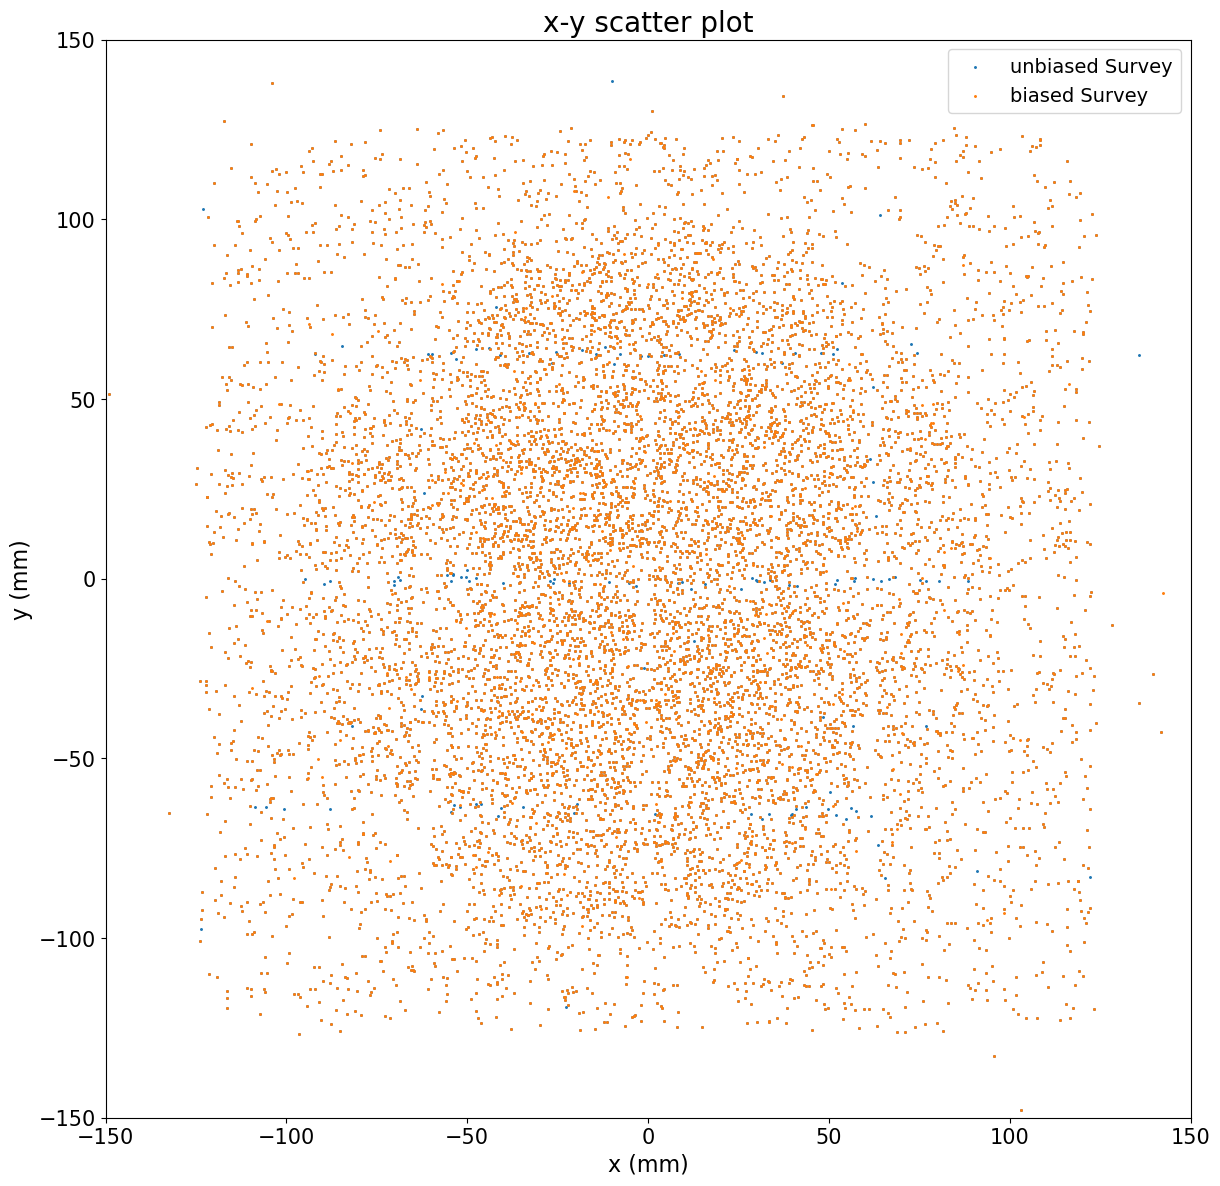

In [13]:
plt.figure(figsize=(14, 14))
plt.scatter(ak.flatten(unb_survey['fitParam_x'])[cutting(unb_survey)], ak.flatten(unb_survey['fitParam_y'])[cutting(unb_survey)], marker='.', s=5, label="unbiased Survey")
plt.scatter(ak.flatten(b_survey['fitParam_x'])[cutting(b_survey)], ak.flatten(b_survey['fitParam_y'])[cutting(b_survey)], marker='.', s=5, label="biased Survey")
#plt.scatter(ak.flatten(unb_st['fitParam_x']), ak.flatten(unb_st['fitParam_y']), marker='.', s=5, label='Unbiased')
#plt.scatter(ak.flatten(b_st['fitParam_x']), ak.flatten(b_st['fitParam_y']), marker='.', s=5, label='Biased')

plt.ylim(-150, 150)
plt.xlabel('x (mm)', fontsize=16)
plt.ylabel('y (mm)', fontsize=16)
plt.legend(fontsize=14)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('x-y scatter plot', fontsize=20)
plt.show()

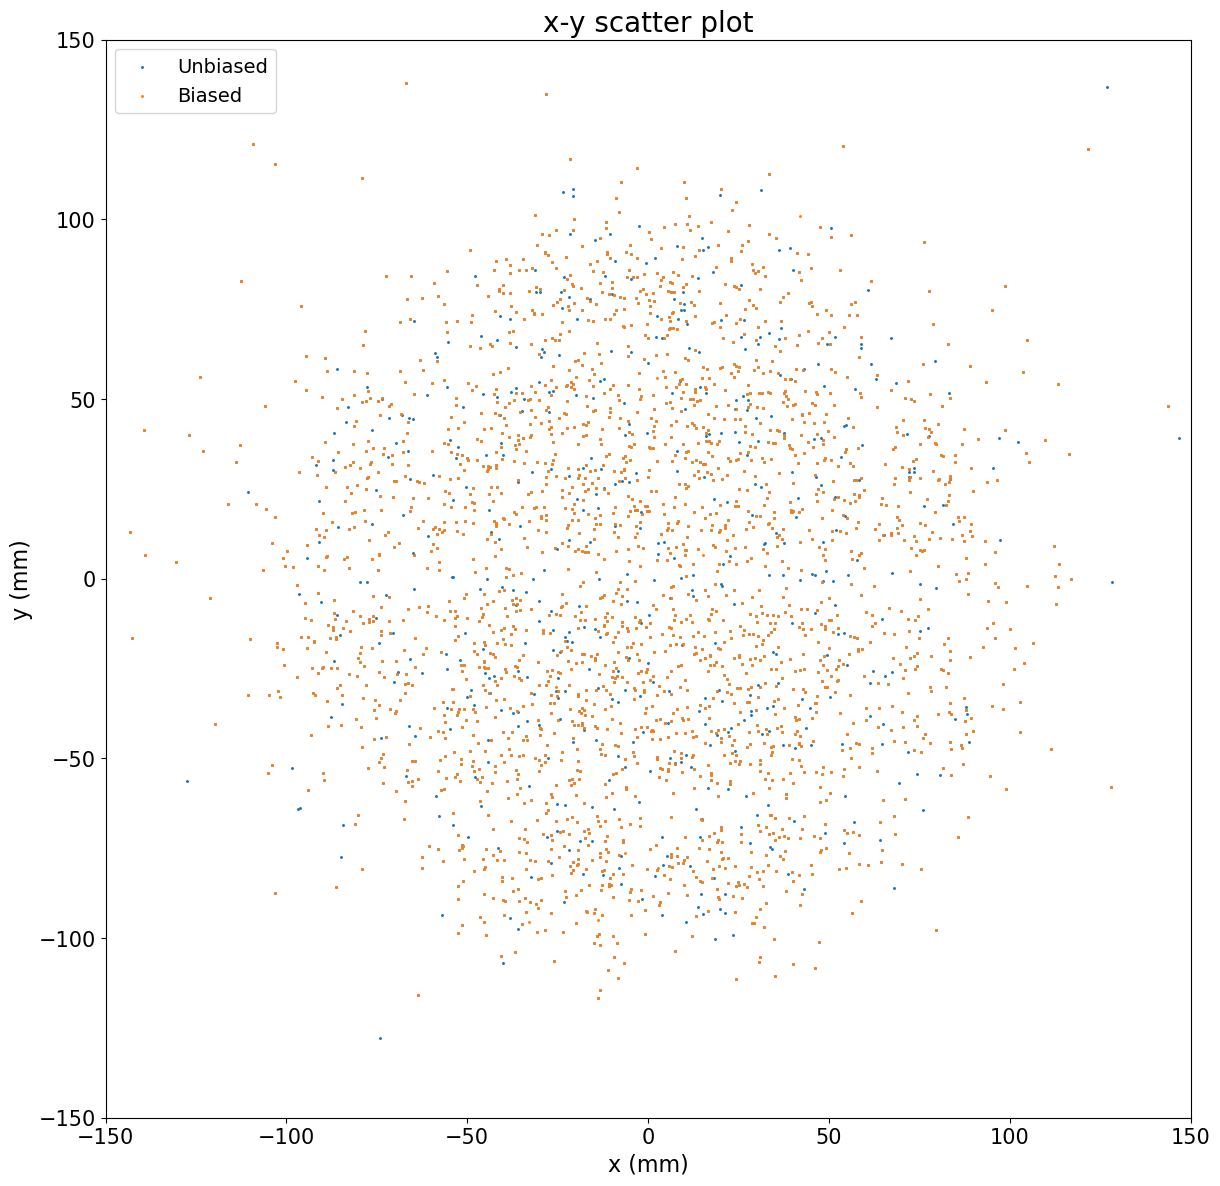

In [15]:
plt.figure(figsize=(14, 14))
plt.scatter(ak.flatten(unb_st['fitParam_x'])[cutting(unb_st)], ak.flatten(unb_st['fitParam_y'])[cutting(unb_st)], marker='.', s=5, label='Unbiased')
plt.scatter(ak.flatten(b_st['fitParam_x'])[cutting(b_st)], ak.flatten(b_st['fitParam_y'])[cutting(b_st)], marker='.', s=5, label='Biased')

plt.ylim(-150, 150)
plt.xlabel('x (mm)', fontsize=16)
plt.ylabel('y (mm)', fontsize=16)
plt.legend(fontsize=14)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('x-y scatter plot', fontsize=20)
plt.show()

In [16]:
# # ty
# plt.figure(figsize=(25, 10))
# plt.subplot(1, 2, 1)
# bin = np.linspace(-0.1, 0.1, 101)
# ke_tx, unb_st_tx, b_st_tx = ak.flatten(ke['fitParam_px'])/ak.flatten(ke['fitParam_pz']), ak.flatten(unb_st['fitParam_px'])/ak.flatten(unb_st['fitParam_pz']), ak.flatten(b_st['fitParam_px'])/ak.flatten(b_st['fitParam_pz'])
# plt.hist(ke_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f"ke's unbiased tx µ: {round(np.mean(ke_tx), 3)}, σ: {round(np.std(ke_tx), 3)}")
# plt.hist(unb_st_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unbiased tx µ: {round(np.mean(unb_st_tx), 3)}, σ: {round(np.std(unb_st_tx), 3)}')
# plt.hist(b_st_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased tx µ: {round(np.mean(b_st_tx), 3)}, σ: {round(np.std(b_st_tx), 3)}')

# plt.xlabel('tx', fontsize=18)
# plt.ylabel('Number of Events (normalized)', fontsize=18)
# plt.title('tx', fontsize=22)
# plt.xticks(fontsize=15)
# plt.legend(fontsize=15)

# # ty
# plt.subplot(1, 2, 2)
# ke_ty, unb_st_ty, b_st_ty = ak.flatten(ke['fitParam_py'])/ak.flatten(ke['fitParam_pz']), ak.flatten(unb_st['fitParam_py'])/ak.flatten(unb_st['fitParam_pz']), ak.flatten(b_st['fitParam_py'])/ak.flatten(b_st['fitParam_pz'])
# plt.hist(ke_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f"ke's unbiased ty µ: {round(np.mean(ke_ty), 3)}, σ: {round(np.std(ke_ty), 3)}")
# plt.hist(unb_st_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unbiased ty µ: {round(np.mean(unb_st_ty), 3)}, σ: {round(np.std(unb_st_ty), 3)}')
# plt.hist(b_st_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased ty µ: {round(np.mean(b_st_ty), 3)}, σ: {round(np.std(b_st_ty), 3)}')

# plt.xlabel('ty', fontsize=18)
# plt.ylabel('Number of Events (normalized)', fontsize=18)
# plt.title('ty', fontsize=22)
# plt.xticks(fontsize=15)

# plt.legend(fontsize=15)

# plt.show()

In [51]:
def plot_cut(data, station, charge, unbiased=True):
    if charge==1 or charge==-1:
        p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
        cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
                       (ak.flatten(data['fitParam_nMeasurements']) > 14)&
                       (p>0)&
                       (ak.flatten(data['fitParam_charge']) == charge))
            #          #(ak.flatten(data['fitParam_pz']) >= p_min)&
            #          #(ak.flatten(data['fitParam_pz']) < p_max)&
            #          (ak.min(ak.flatten(data['fitParam_align_stationId_sp']), axis=-1)==0)&
            #          (ak.min(ak.flatten(data['fitParam_align_layerId_sp']), axis=-1)==0)&
    else:
        p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
        cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
                       (p>0)&
                       (ak.flatten(data['fitParam_nMeasurements']) > 14))
        
    res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
    sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
    bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])

    if unbiased==True:
        return res_x[ak.where((sta==station)&(bias==3))]
    elif unbiased==False:
        return res_x[ak.where((sta==station)&(bias==0))]
    else: 
        return res_x[ak.where(sta==station)]

In [17]:
# res_x = ak.flatten(ak.flatten(unb_survey['fitParam_align_local_residual_x_sp']))
# sta = ak.flatten(ak.flatten(unb_survey['fitParam_align_stationId_sp']))
# bias = ak.flatten(ak.flatten(unb_survey['fitParam_align_unbiased_sp']))
# print(res_x[ak.where((sta==0)&(bias==3))])
# print(ak.where(ak.flatten(ak.flatten(b_st['fitParam_align_stationId_sp']))==3))

In [32]:
def plot(charge):
    plt.figure(figsize=(24, 16))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    sta=0

    plt.subplot(2, 2, 1)
    plt.hist(plot_cut(unb_st, sta, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_perfect_geo µ: {round(np.median(plot_cut(unb_st, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_st, sta, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_survey, sta, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_survey µ: {round(np.median(plot_cut(unb_survey, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_survey, sta, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(b_survey, sta, charge, unbiased=False), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'b_survey µ: {round(np.median(plot_cut(b_survey, sta, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_survey, sta, charge, unbiased=False)), 2)}')
    plt.hist(plot_cut(b_st, sta, charge, unbiased=False),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'b_perfect_geo µ: {round(np.median(plot_cut(b_st, sta, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_st, sta, charge, unbiased=False)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f'Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta}', fontsize=36)

    plt.subplot(2, 2, 2)
    plt.hist(plot_cut(unb_st, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_st µ: {round(np.median(plot_cut(unb_st, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_st, sta+1, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+1, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_survey, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_survey µ: {round(np.median(plot_cut(unb_survey, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_survey, sta+1, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(b_survey, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'b_survey µ: {round(np.median(plot_cut(b_survey, sta+1, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_survey, sta+1, charge, unbiased=False)), 2)}')
    plt.hist(plot_cut(b_st, sta+1, charge, unbiased=False),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'b_st µ: {round(np.median(plot_cut(b_st, sta+1, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_st, sta+1, charge, unbiased=False)), 2)}')
    plt.xlabel(' Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+1}', fontsize=36)

    plt.subplot(2, 2, 3)
    plt.hist(plot_cut(unb_st, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_st µ: {round(np.median(plot_cut(unb_st, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_st, sta+2, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+2, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_survey, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_survey µ: {round(np.median(plot_cut(unb_survey, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_survey, sta+2, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(b_survey, sta+2, charge, unbiased=False), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'b_survey µ: {round(np.median(plot_cut(b_survey, sta+2, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_survey, sta+2, charge, unbiased=False)), 2)}')
    plt.hist(plot_cut(b_st, sta+2, charge, unbiased=False),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'b_st µ: {round(np.median(plot_cut(b_st, sta+2, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_st, sta+2, charge, unbiased=False)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+2}', fontsize=36)

    plt.subplot(2, 2, 4)
    plt.hist(plot_cut(unb_st, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_st µ: {round(np.median(plot_cut(unb_st, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_st, sta+3, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+3, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_survey, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_survey µ: {round(np.median(plot_cut(unb_survey, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_survey, sta+3, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(b_survey, sta+3, charge, unbiased=False), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'b_survey µ: {round(np.median(plot_cut(b_survey, sta+3, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_survey, sta+3, charge, unbiased=False)), 2)}')
    plt.hist(plot_cut(b_st, sta+3, charge, unbiased=False),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'b_st µ: {round(np.median(plot_cut(b_st, sta+3, charge, unbiased=False)), 2)}, IQR50: {round(iqr(plot_cut(b_st, sta+3, charge, unbiased=False)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+3}', fontsize=36)

    plt.show()

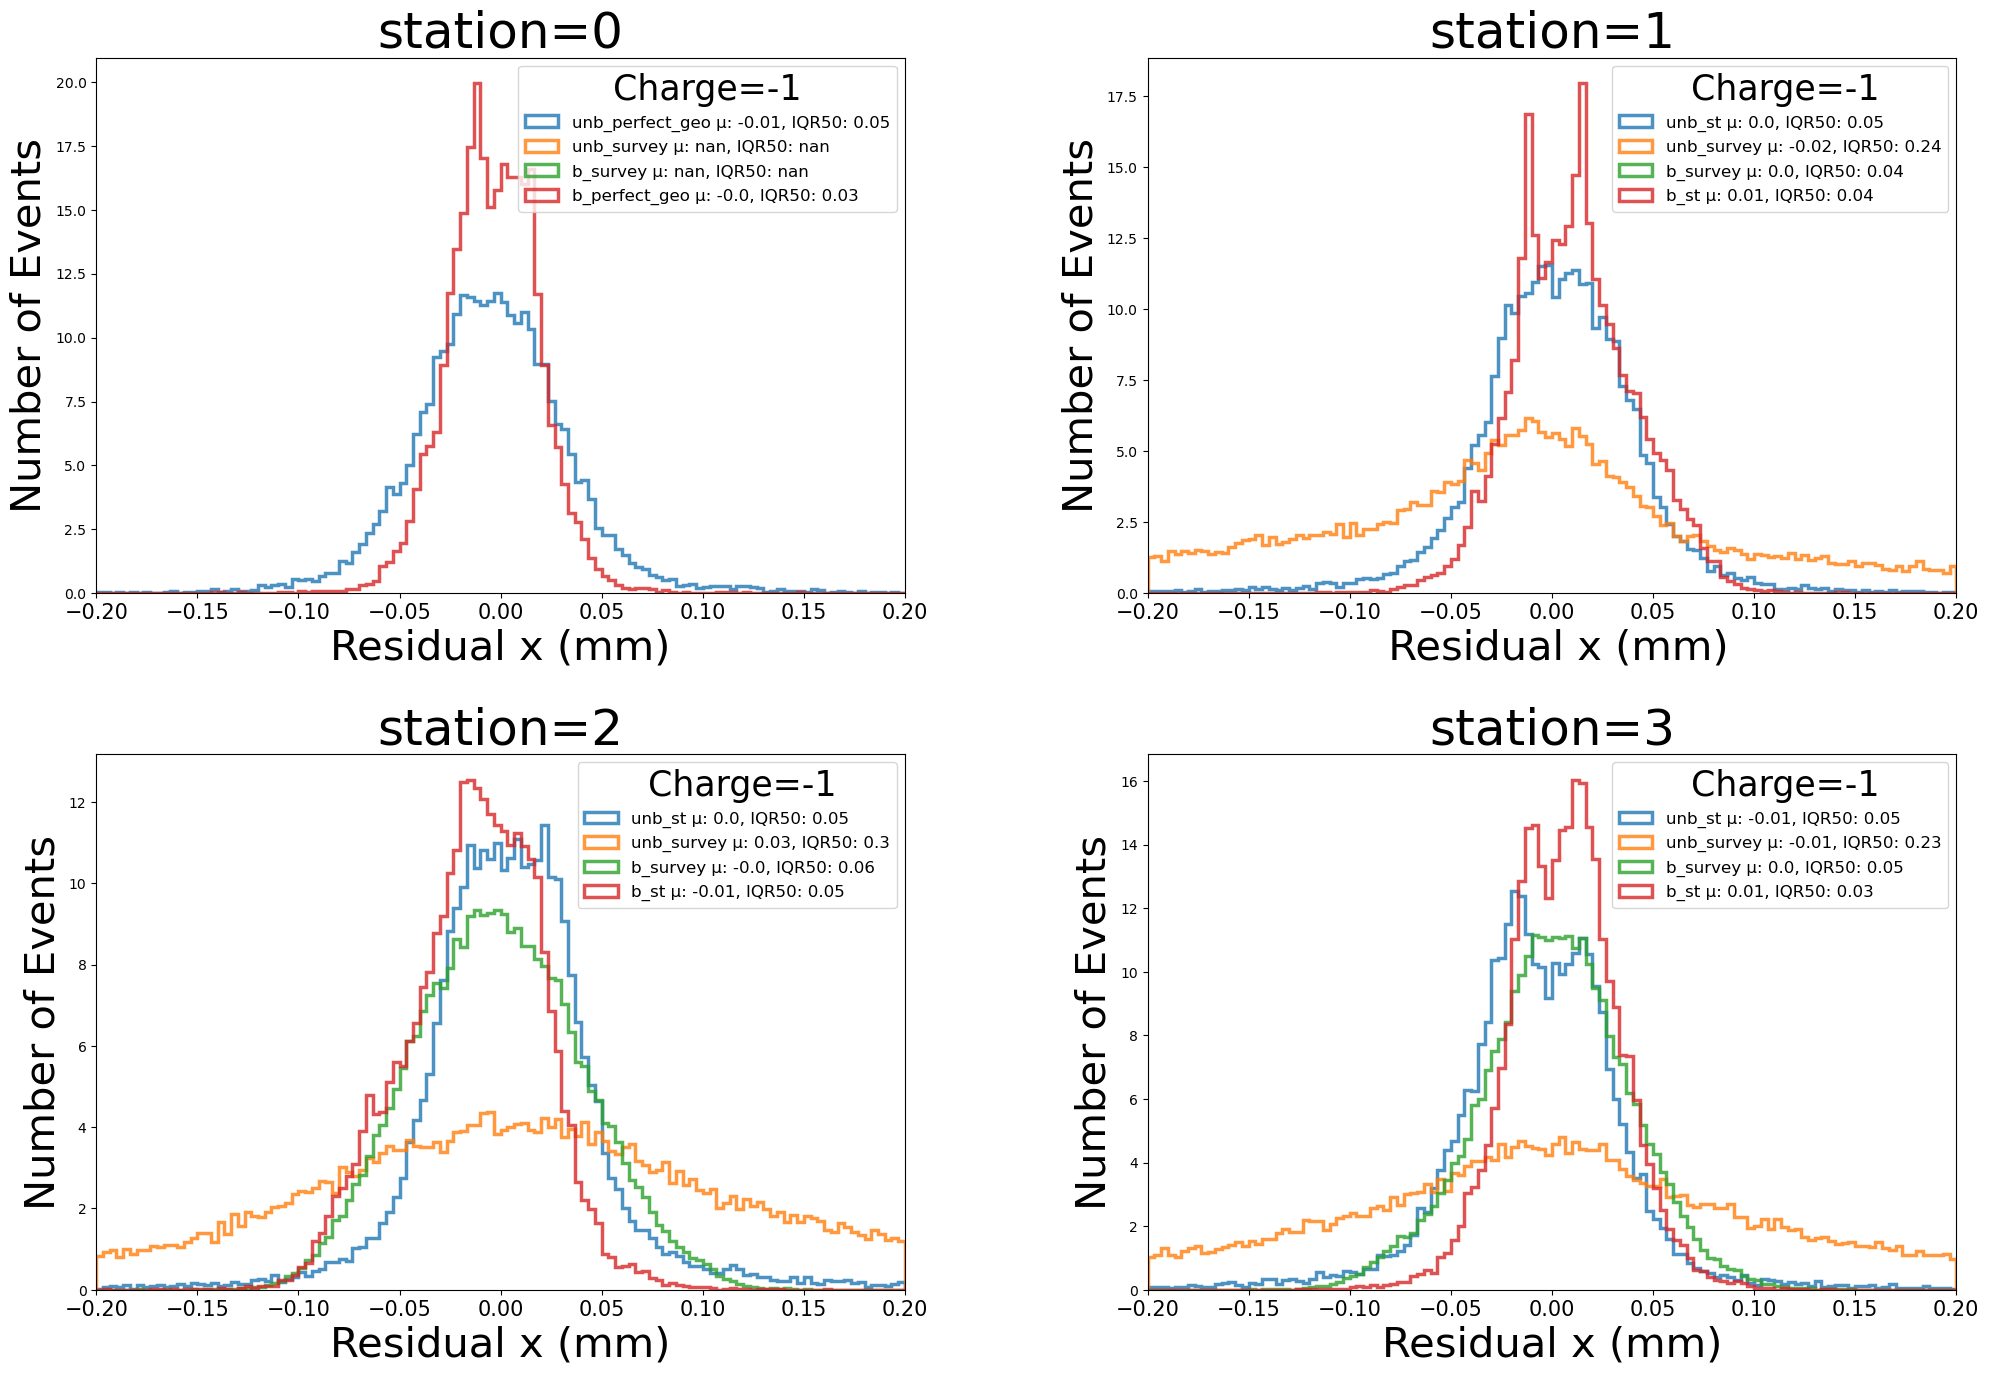

In [33]:
plot(-1)

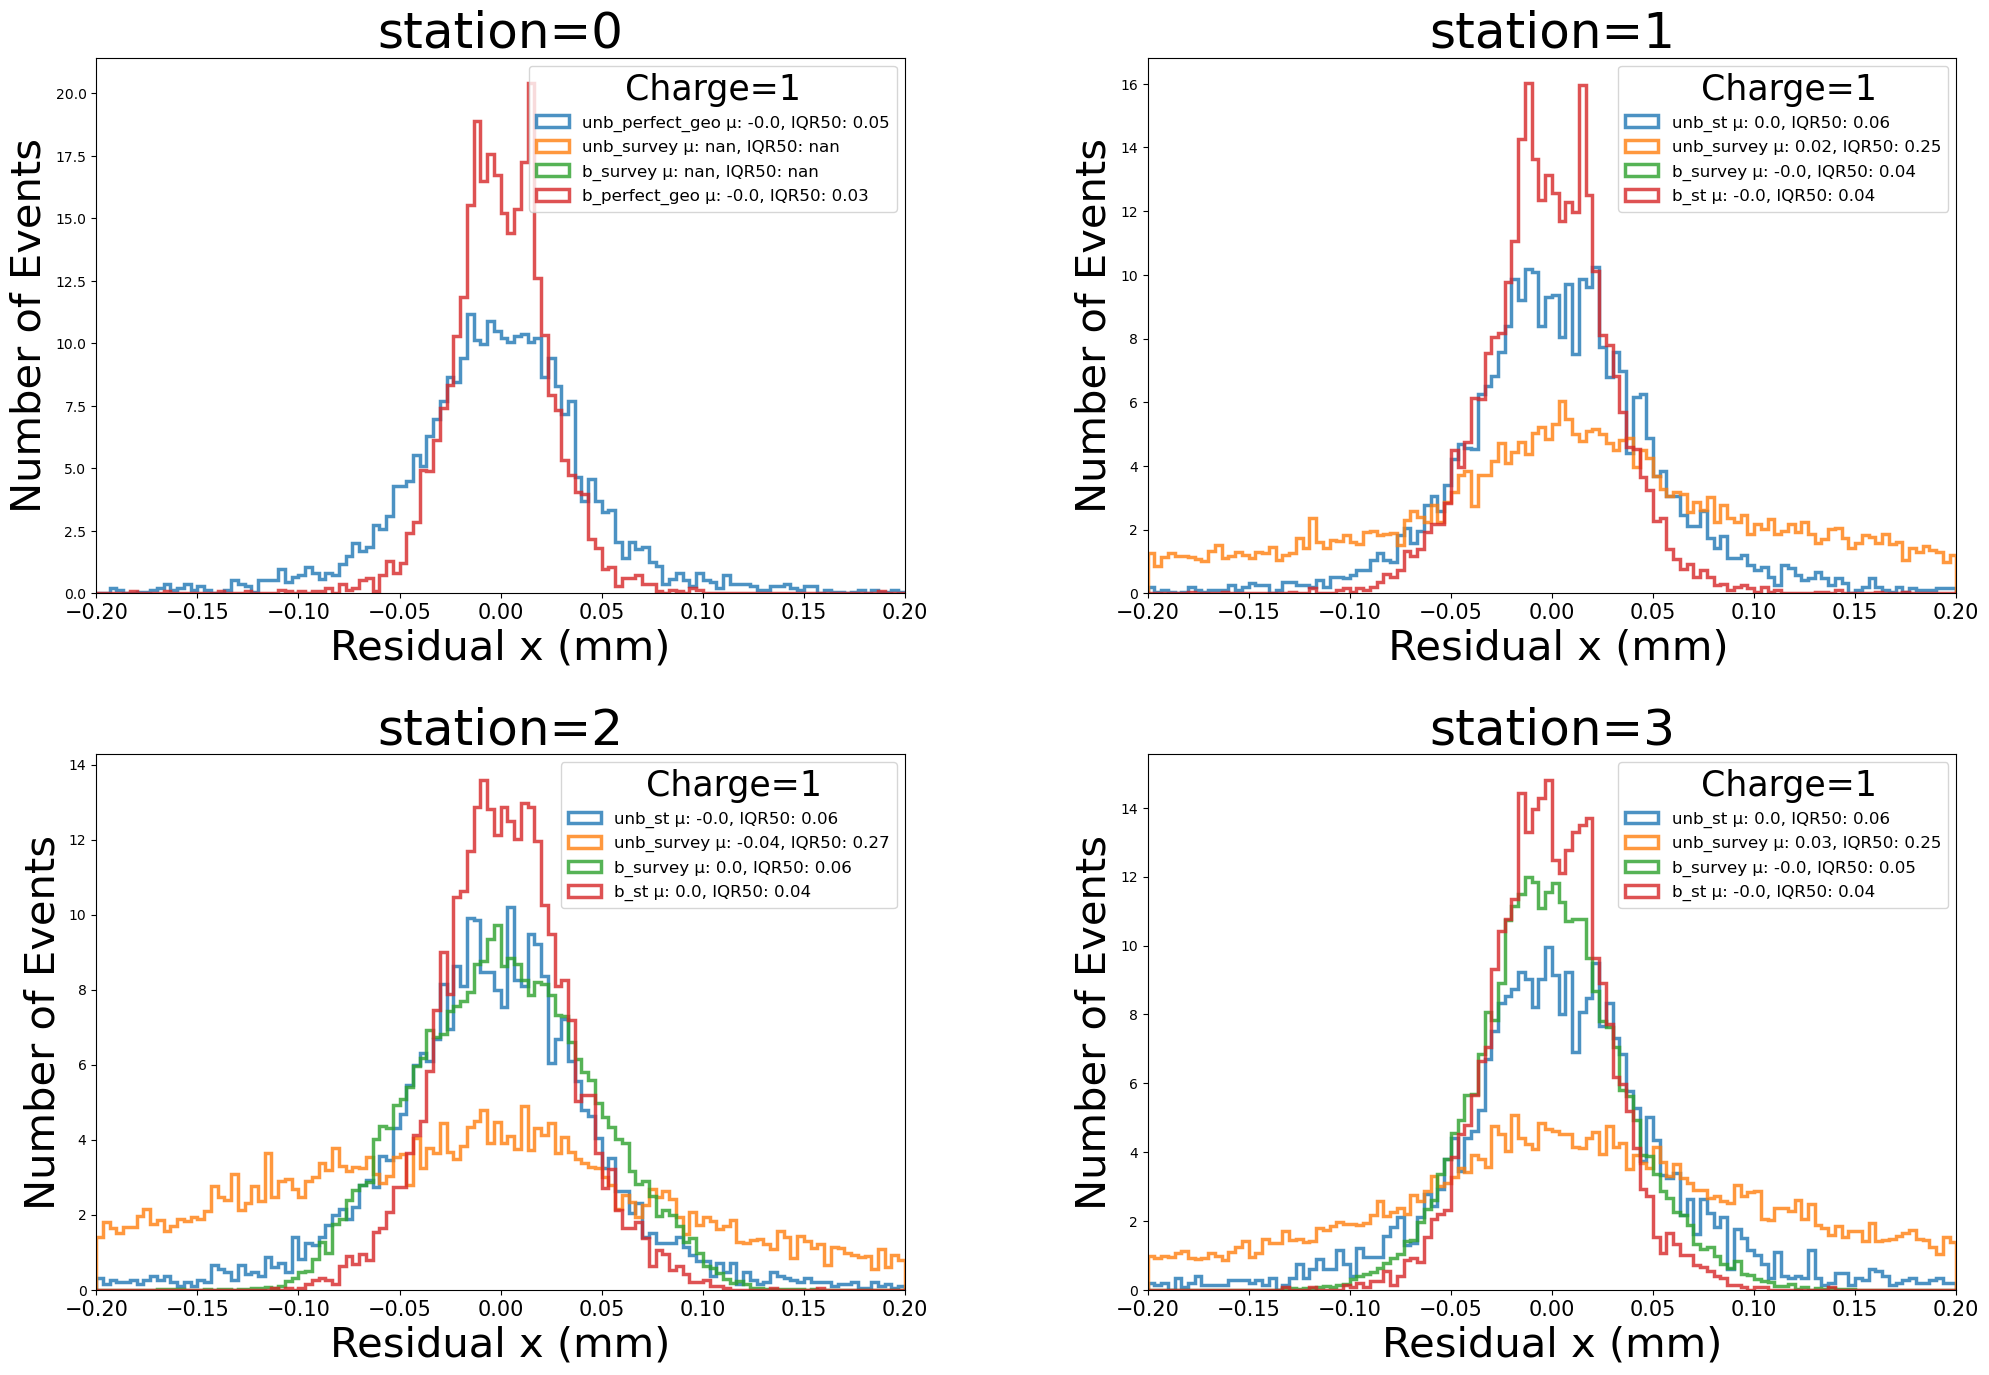

In [48]:
plot(1)

In [14]:
# def res(data, station, layer, unbiased=True):    
#     p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
#     cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
#                    (p>100)&
#                    (ak.flatten(data['fitParam_nMeasurements']) > 14))
    
#     res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
#     sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
#     lay = ak.flatten(ak.flatten(data['fitParam_align_layerId_sp'])[cut])
#     # mod = ak.flatten(ak.flatten(data['fitParam_align_moduleId_sp'])[cut])
#     # ste = ak.flatten(ak.flatten(data['fitParam_align_stereoId'])[cut])
#     bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])


#     if unbiased==True:
#         return res_x[ak.where((sta==station)&(bias==3)&(lay==layer))]
#     elif unbiased==False:
#         return res_x[ak.where((sta==station)&(bias==0)&(lay==layer))]

In [15]:
# for i in range(4):
#     for j in range(3):
#         plt.figure(figsize=(8, 6),  dpi=100)
#         plt.hist(res(unb_st, i, j, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unbiased µ: {round(np.median(res(unb_st, i, j, unbiased=True)), 3)}, IQR: {round(iqr(res(unb_st, i, j, unbiased=True)), 3)}')
#         plt.hist(res(ke, i, j, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'Ke µ: {round(np.median(res(ke, i, j, unbiased=True)), 3)}, IQR: {round(iqr(res(ke, i, j, unbiased=True)), 3)}')
#         plt.hist(res(b_st, i, j, unbiased=False), histtype='step',linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'Biased µ: {round(np.median(res(b_st, i, j, unbiased=False)), 3)}, IQR: {round(iqr(res(b_st, i, j, unbiased=False)), 3)}')
#         plt.xlabel('Residual x (mm)', fontsize=18)
#         plt.ylabel('Events', fontsize=18)
#         #plt.xlim(-0.2, 0.2)
#         plt.legend(fontsize=10, loc='upper left')
#         plt.title(f'(station={i}, layer={j})', fontsize=18)
#         # plt.savefig('SIC_vs_TPR.pdf', dpi=1200, format='pdf', bbox_inches='tight')
#         plt.show()